In [1]:
import pandas as pd
import numpy as np
#visuals
import matplotlib.pyplot as plt
import seaborn as sns
#db
import psycopg2 as psy
#for decoding the IP's location
import geoip2.database


In [38]:
Feb6 = pd.read_csv('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/2023-02-06.csv')

In [65]:
Feb6.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Subflow Fwd Bytes,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,162278.000000,162278.000000,162278.000000,1.622780e+05,162278.000000,162278.000000,162278.000000,1.622780e+05,162278.000000,162278.000000,...,162278.000000,162278.000000,162278.000000,162278.000000,162278.000000,162278.000000,1.622780e+05,1.622780e+05,1.622780e+05,1.622780e+05
mean,32833.672981,431.671736,16.648061,5.192189e+07,72.135354,0.395525,598.314633,1.532645e+02,15.469768,9.568882,...,9.136852,4.096495,791.133370,263.047764,71.078168,8.631065,9.656473e+14,9.810193e+14,1.675717e+15,2.766874e+14
std,19016.502996,3684.013130,1.935844,3.609918e+07,428.722006,11.629813,4197.190717,1.623823e+04,68.930309,16.063857,...,13.161848,33.928668,6348.200365,4017.137257,428.729481,3.623402,3.203097e+14,4.383001e+14,1.498794e+10,6.221657e+14
min,0.000000,19.000000,6.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.196894e+14,0.000000e+00,1.675642e+15,5.000336e+06
25%,16320.000000,123.000000,17.000000,2.145707e+07,2.000000,0.000000,16.000000,0.000000e+00,8.000000,8.000000,...,8.000000,0.000000,0.000000,0.000000,1.000000,8.000000,8.378591e+14,1.184909e+15,1.675716e+15,3.336530e+07
50%,33130.500000,123.000000,17.000000,4.817127e+07,2.000000,0.000000,16.000000,0.000000e+00,8.000000,8.000000,...,8.000000,0.000000,0.000000,0.000000,1.000000,8.000000,8.378612e+14,1.184913e+15,1.675721e+15,6.706448e+07
75%,49301.000000,123.000000,17.000000,8.283794e+07,2.000000,0.000000,16.000000,0.000000e+00,8.000000,8.000000,...,8.000000,0.000000,0.000000,0.000000,1.000000,8.000000,8.378633e+14,1.184916e+15,1.675724e+15,1.056456e+08
max,65534.000000,64296.000000,17.000000,1.199999e+08,17457.000000,4560.000000,619427.000000,6.467851e+06,1448.000000,1336.000000,...,1105.000000,1361.000000,65535.000000,65160.000000,17456.000000,52.000000,1.675728e+15,1.184919e+15,1.675728e+15,1.675728e+15


<Axes: xlabel='Value', ylabel='Feature'>

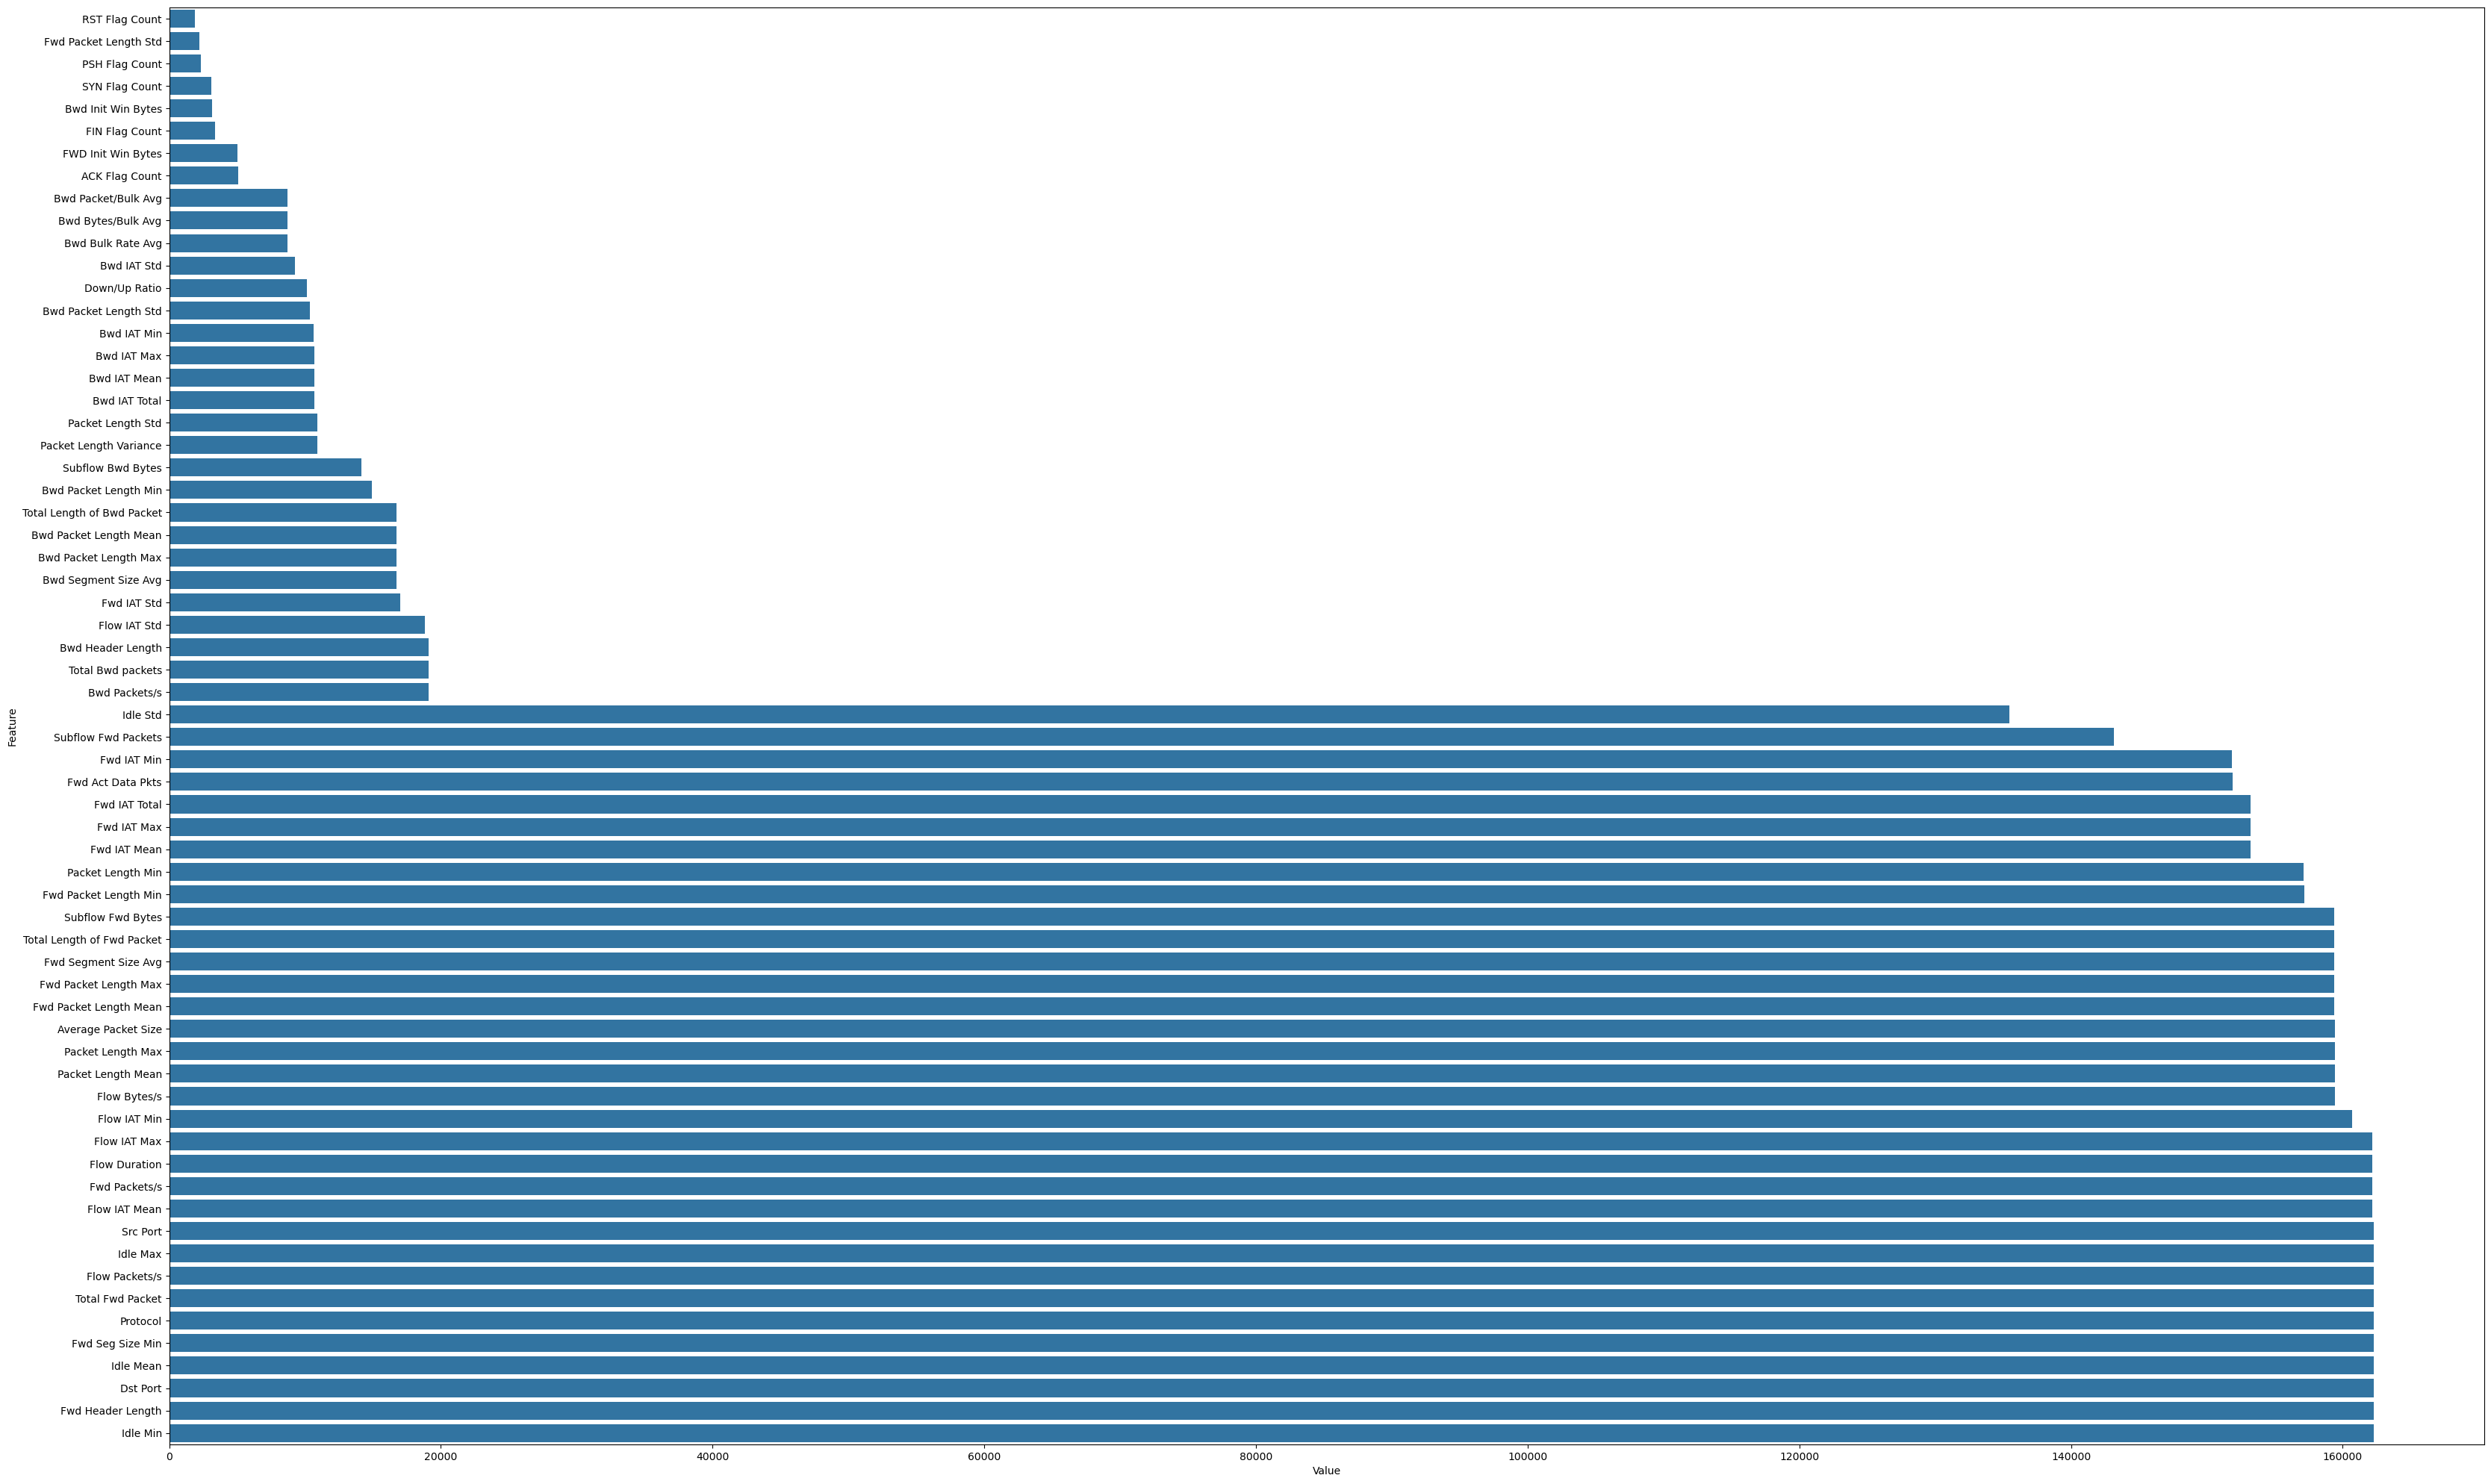

In [39]:
greater_than_zero_counts = {}
total_rows = len(Feb6)
for column in Feb6.columns:
    # Check if the column is numeric to avoid errors
    if pd.api.types.is_numeric_dtype(Feb6[column]):
        count = (Feb6[column] > 0).sum()
        greater_than_zero_counts[column] = count
greater_than_zero_counts = pd.DataFrame(greater_than_zero_counts.items(), columns=['Feature', 'Value'])
zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] < total_rows*.01]
greater_than_zero_counts = greater_than_zero_counts[greater_than_zero_counts['Value'] > total_rows*.01].sort_values(by='Value')
plt.figure(figsize=(40,25))
sns.barplot(greater_than_zero_counts, y='Feature', x='Value')

In [41]:
zero_counts

,Feature,Value
32,Fwd PSH Flags,136
33,Bwd PSH Flags,0
34,Fwd URG Flags,0
35,Bwd URG Flags,0
50,URG Flag Count,0
51,CWR Flag Count,42
52,ECE Flag Count,42
57,Fwd Bytes/Bulk Avg,0
58,Fwd Packet/Bulk Avg,0
59,Fwd Bulk Rate Avg,0


In [105]:
drop_cols = zero_counts['Feature'].to_list()
#Feb6 = Feb6.drop(columns=drop_cols)
Feb6

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Location
0,61.177.172.145-10.1.0.4-37881-22-6,61.177.172.145,37881,10.1.0.4,22,6,2023-02-06 00:00:15,582135,3,4,...,29200,509,1,32,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,cowrie,China
1,61.177.172.145-10.1.0.4-37881-22-6,61.177.172.145,37881,10.1.0.4,22,6,2023-02-06 00:00:17,395,3,0,...,229,0,1,32,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,cowrie,China
2,91.195.240.12-10.1.0.4-5960-123-17,91.195.240.12,5960,10.1.0.4,123,17,2023-02-06 00:00:48,30007782,557,4,...,0,0,556,8,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Germany
3,91.195.240.12-10.1.0.4-4689-123-17,91.195.240.12,4689,10.1.0.4,123,17,2023-02-06 00:00:48,29992657,591,4,...,0,0,590,8,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Germany
4,91.195.240.12-10.1.0.4-3683-123-17,91.195.240.12,3683,10.1.0.4,123,17,2023-02-06 00:00:48,30013940,615,4,...,0,0,614,8,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162273,95.162.223.26-10.1.0.4-50900-123-17,95.162.223.26,50900,10.1.0.4,123,17,2023-02-06 23:59:59,28213032,2,0,...,0,0,1,8,8.378640e+14,1.184919e+15,1.675728e+15,2.821303e+07,ddospot,Iran
162274,95.162.223.26-10.1.0.4-59861-123-17,95.162.223.26,59861,10.1.0.4,123,17,2023-02-06 23:59:59,80298510,2,0,...,0,0,1,8,8.378640e+14,1.184919e+15,1.675728e+15,8.029851e+07,ddospot,Iran
162275,95.162.210.103-10.1.0.4-1492-123-17,95.162.210.103,1492,10.1.0.4,123,17,2023-02-06 23:59:59,62600014,2,0,...,0,0,1,8,8.378640e+14,1.184919e+15,1.675728e+15,6.260001e+07,ddospot,Iran
162276,95.162.215.209-10.1.0.4-64689-123-17,95.162.215.209,64689,10.1.0.4,123,17,2023-02-06 23:59:59,114660707,2,0,...,0,0,1,8,8.378641e+14,1.184919e+15,1.675728e+15,1.146607e+08,ddospot,Iran


In [106]:
drop_cols

['Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'URG Flag Count',
 'CWR Flag Count',
 'ECE Flag Count',
 'Fwd Bytes/Bulk Avg',
 'Fwd Packet/Bulk Avg',
 'Fwd Bulk Rate Avg',
 'Subflow Bwd Packets',
 'Active Mean',
 'Active Std',
 'Active Max',
 'Active Min']

Src Port and Dst Port are both describing which port at the IP address is active in this data. While we are interested in where the Source is, our analysis simply looks at the Country of Origin. Ports are unneccessary and should be removed. Along this same logic, Flow ID and Dest ID can be romved as well. Our next step is encoding the 'Src IP'

In [88]:
reader = geoip2.database.Reader('/Users/sa12/Documents/Repositories/The-CyberChase/CybercrimeData/GeoLite2-City.mmdb')
# Build location info
locations_2 = []

for ip in Feb6['Src IP']:
    try:
        response = reader.city(ip)
        country = response.country.name or "Unknown Country"
        city = response.city.name or "Unknown City"

        location_str = f"{country}"
    except Exception as e:
        location_str = f"Error: {e}"

    locations_2.append(location_str)

# Add to DataFrame
Feb6['Location'] = locations_2
Feb6

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Location
0,61.177.172.145-10.1.0.4-37881-22-6,61.177.172.145,37881,10.1.0.4,22,6,2023-02-06 00:00:15,582135,3,4,...,29200,509,1,32,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,cowrie,China
1,61.177.172.145-10.1.0.4-37881-22-6,61.177.172.145,37881,10.1.0.4,22,6,2023-02-06 00:00:17,395,3,0,...,229,0,1,32,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,cowrie,China
2,91.195.240.12-10.1.0.4-5960-123-17,91.195.240.12,5960,10.1.0.4,123,17,2023-02-06 00:00:48,30007782,557,4,...,0,0,556,8,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Germany
3,91.195.240.12-10.1.0.4-4689-123-17,91.195.240.12,4689,10.1.0.4,123,17,2023-02-06 00:00:48,29992657,591,4,...,0,0,590,8,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Germany
4,91.195.240.12-10.1.0.4-3683-123-17,91.195.240.12,3683,10.1.0.4,123,17,2023-02-06 00:00:48,30013940,615,4,...,0,0,614,8,1.675642e+15,0.000000e+00,1.675642e+15,1.675642e+15,ddospot,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162273,95.162.223.26-10.1.0.4-50900-123-17,95.162.223.26,50900,10.1.0.4,123,17,2023-02-06 23:59:59,28213032,2,0,...,0,0,1,8,8.378640e+14,1.184919e+15,1.675728e+15,2.821303e+07,ddospot,Iran
162274,95.162.223.26-10.1.0.4-59861-123-17,95.162.223.26,59861,10.1.0.4,123,17,2023-02-06 23:59:59,80298510,2,0,...,0,0,1,8,8.378640e+14,1.184919e+15,1.675728e+15,8.029851e+07,ddospot,Iran
162275,95.162.210.103-10.1.0.4-1492-123-17,95.162.210.103,1492,10.1.0.4,123,17,2023-02-06 23:59:59,62600014,2,0,...,0,0,1,8,8.378640e+14,1.184919e+15,1.675728e+15,6.260001e+07,ddospot,Iran
162276,95.162.215.209-10.1.0.4-64689-123-17,95.162.215.209,64689,10.1.0.4,123,17,2023-02-06 23:59:59,114660707,2,0,...,0,0,1,8,8.378641e+14,1.184919e+15,1.675728e+15,1.146607e+08,ddospot,Iran


In [100]:
dogs = Feb6.select_dtypes(include=['int64', 'float64'])
strong_corr = (dogs.corr().abs() >= 0.85) & (dogs.corr().abs() < 1.0)
# where keeps strong values, stack to get pairs
strong_pairs = dogs.corr().where(strong_corr).stack().reset_index()

# rename
strong_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

strong_pairs[['Feature1', 'Feature2']] = strong_pairs[['Feature1', 'Feature2']].apply(
    lambda row: sorted(row), axis=1, result_type='expand')

# Drop duplicates
strong_pairs = strong_pairs.drop_duplicates(subset=['Feature1', 'Feature2'])

feature_counts = pd.concat([strong_pairs['Feature1'], strong_pairs['Feature2']]).value_counts()

# Define a function to order by frequency
def order_by_freq(row):
    f1, f2 = row['Feature1'], row['Feature2']
    return (f1, f2) if feature_counts[f1] >= feature_counts[f2] else (f2, f1)

# Apply function row-wise
strong_pairs[['Feature1', 'Feature2']] = strong_pairs.apply(order_by_freq, axis=1, result_type='expand')

# Drop duplicates again after reordering
strong_pairs = strong_pairs.drop_duplicates(subset=['Feature1', 'Feature2'])

strong_pairs

,Feature1,Feature2,Correlation
0,Fwd Seg Size Min,Protocol,-0.957989
1,Flow Duration,Flow IAT Mean,0.957751
2,Flow Duration,Flow IAT Max,0.976174
3,Flow Duration,Flow IAT Min,0.923920
4,Flow Duration,Fwd IAT Total,0.999713
...,...,...,...
122,Subflow Fwd Bytes,Fwd Segment Size Avg,0.916777
132,Bwd Packet/Bulk Avg,Fwd Act Data Pkts,0.999641
142,Idle Mean,Idle Std,-0.965197
143,Idle Mean,Idle Min,0.985834


In [96]:
strong_pairs['Feature1'].value_counts()

Feature1
Flow Duration             7
Flow IAT Max              6
Flow IAT Mean             5
ACK Flag Count            4
Average Packet Size       4
Bwd Packet Length Max     4
Flow IAT Min              4
Fwd IAT Max               3
Packet Length Mean        3
Bwd Bytes/Bulk Avg        3
Bwd Packet/Bulk Avg       3
Bwd Packet Length Mean    2
Fwd IAT Mean              2
Fwd Act Data Pkts         2
Bwd IAT Max               2
Idle Mean                 2
Bwd Header Length         2
FIN Flag Count            1
Fwd Segment Size Avg      1
Fwd Seg Size Min          1
Bwd Segment Size Avg      1
Bwd IAT Mean              1
Packet Length Std         1
Fwd Header Length         1
Total Bwd packets         1
Fwd IAT Min               1
Flow IAT Std              1
Flow Packets/s            1
Bwd Packet Length Std     1
Bwd Packet Length Min     1
Fwd Packet Length Mean    1
Fwd Packet Length Max     1
Idle Min                  1
Name: count, dtype: int64

In [99]:
strong_pairs['Feature2'].value_counts()

Feature2
Fwd IAT Total                 7
Fwd IAT Min                   6
Fwd IAT Mean                  5
Fwd IAT Max                   4
Total Length of Bwd Packet    4
Flow IAT Min                  3
Total Fwd Packet              3
Total Bwd packets             3
Packet Length Variance        3
Bwd Packet Length Min         2
Bwd Segment Size Avg          2
Packet Length Std             2
Subflow Bwd Bytes             2
Flow IAT Mean                 2
Fwd Header Length             2
Bwd Packet Length Std         2
Bwd Packet Length Mean        2
Bwd Header Length             2
Idle Std                      2
Bwd Bytes/Bulk Avg            1
FIN Flag Count                1
Packet Length Mean            1
Fwd Act Data Pkts             1
Fwd Segment Size Avg          1
Protocol                      1
Bwd IAT Min                   1
Bwd IAT Mean                  1
Bwd IAT Total                 1
Fwd IAT Std                   1
Fwd Packets/s                 1
Packet Length Max             1

In [102]:
strong_pairs.groupby(['Feature1','Feature2'])['Correlation'].mean()

Feature1             Feature2                  
ACK Flag Count       Bwd Bytes/Bulk Avg            0.942230
                     Bwd Header Length             0.983715
                     Total Bwd packets             0.981000
                     Total Length of Bwd Packet    0.947738
Average Packet Size  Packet Length Mean            0.990698
                                                     ...   
Packet Length Mean   Subflow Bwd Bytes             0.904889
Packet Length Std    Packet Length Variance        0.904401
Subflow Fwd Bytes    Fwd Packet Length Mean        0.916777
                     Fwd Segment Size Avg          0.916777
Total Bwd packets    Total Length of Bwd Packet    0.987198
Name: Correlation, Length: 74, dtype: float64

In [ ]:
Feb6 = Feb6.drop(columns=['Flow ID','Src IP', 'Dest IP', 'Dest Port'])

In [87]:
Hack_Src_IP = Feb6[Feb6['Src IP'] == '10.1.0.4']
Hack_Src_IP.groupby('Src Port')

Src Port  Flow ID                              Src IP    Dst IP          Dst Port  Protocol  Timestamp            Flow Duration  Total Fwd Packet  Total Bwd packets  Total Length of Fwd Packet  Total Length of Bwd Packet  Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  Flow Bytes/s   Flow Packets/s  Flow IAT Mean  Flow IAT Std   Flow IAT Max  Flow IAT Min  Fwd IAT Total  Fwd IAT Mean  Fwd IAT Std   Fwd IAT Max  Fwd IAT Min  Bwd IAT Total  Bwd IAT Mean   Bwd IAT Std   Bwd IAT Max  Bwd IAT Min  Fwd Header Length  Bwd Header Length  Fwd Packets/s  Bwd Packets/s  Packet Length Min  Packet Length Max  Packet Length Mean  Packet Length Std  Packet Length Variance  FIN Flag Count  SYN Flag Count  RST Flag Count  PSH Flag Count  ACK Flag Count  Down/Up Ratio  Average Packet Size  Fwd Segment Size Avg  Bwd Segment Size Avg  Bwd Bytes/Bulk Avg  Bwd Packet/Bulk

<Axes: >

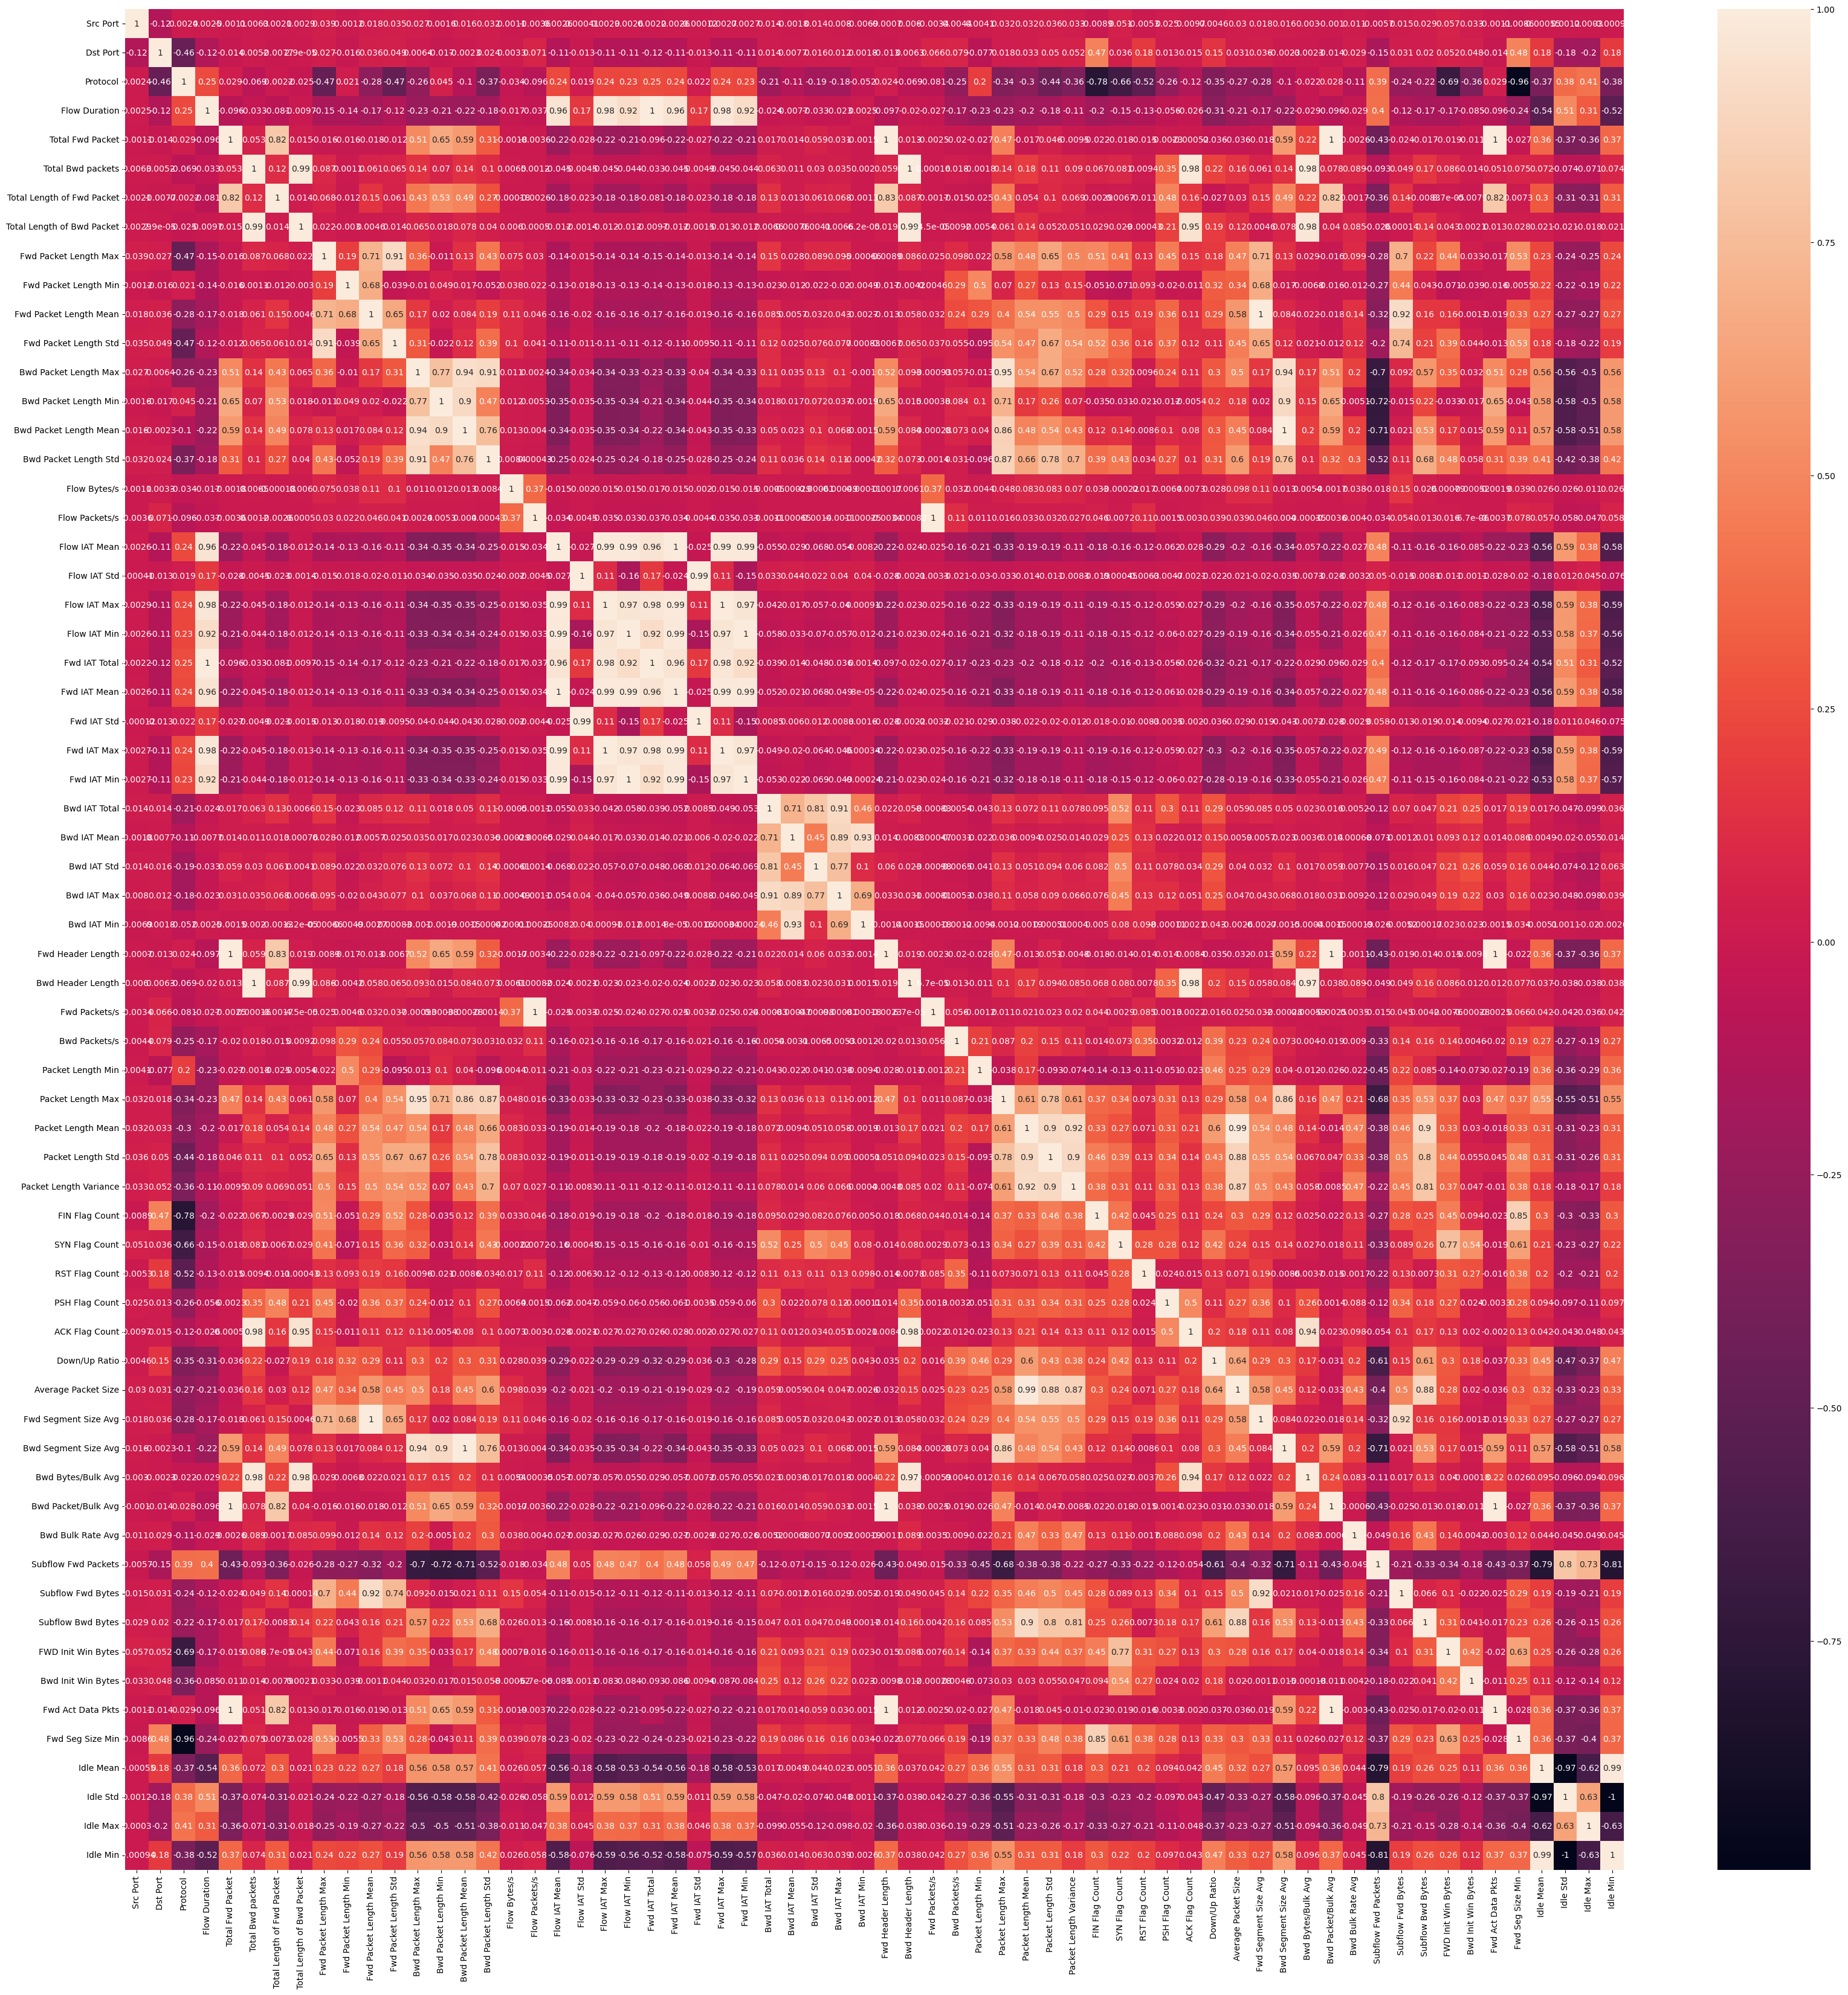

In [64]:
plt.figure(figsize=(40,40))
sns.heatmap(dogs.corr(), annot=True)